<a href="https://colab.research.google.com/github/DeepthiManthapuram/EDA/blob/main/Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assesment
#task1
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

#mount your drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Bengaluru_House_Data.csv'

df = pd.read_csv(path)
print(df.head)
t = df.tail(5)
print("t=",t)
print(df.shape)
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move       

Task 2 — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after

/tmp/ipython-input-422347033.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-422347033.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

            total_sqft      bath     price
total_sqft    1.000000  0.385367  0.573858
bath          0.385367  1.000000  0.450564
price         0.573858  0.450564  1.000000


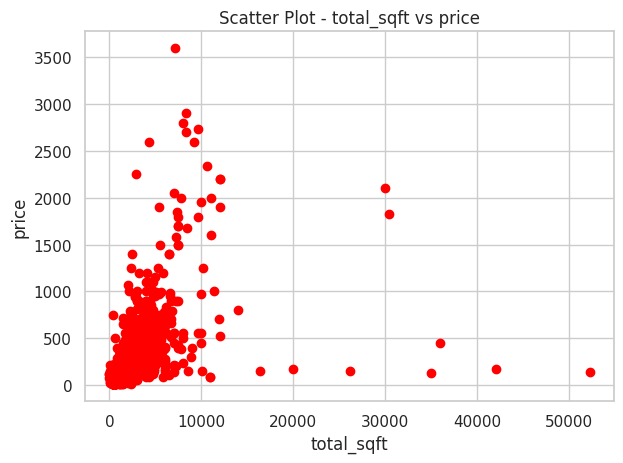

In [ ]:
#task2
df.isnull().sum()
#deleting column society
df.drop(['society'],axis=1,inplace=True,errors='ignore')
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)

# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()
print(df[['total_sqft','bath','price']].corr())
x=df['total_sqft']
y=df['price']
plt.scatter(x, y, color='red')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot - total_sqft vs price')
plt.tight_layout()
plt.show()



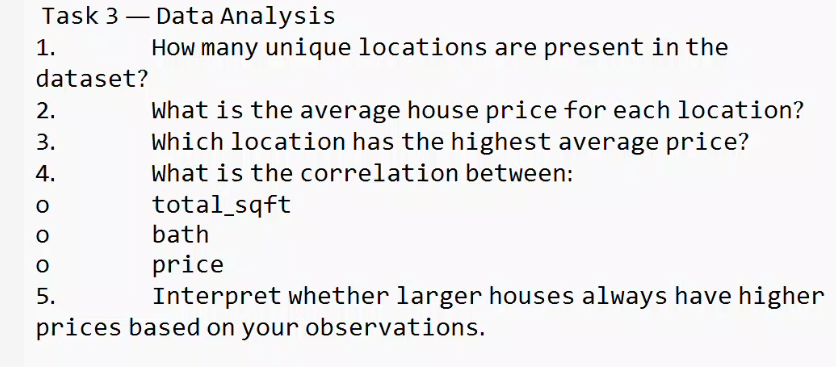

In [ ]:

print(df['location'].nunique)
avg_house_price = df.groupby('location')['price'].mean()
print(avg_house_price)
print(max(avg_house_price))


<bound method IndexOpsMixin.nunique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object>
location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Bhoganhalli             22.890000
 Devarabeesana Halli    124.833333
                           ...    
t.c palya               160.000000
tc.palya                 60.750000
vinayakanagar           200.000000
white field,kadugodi    275.000000
whitefiled               32.730000
Name: price, Length: 1305, dtype: float64
1900.0


ValueError: could not convert string to float: '2100 - 2850'

In [ ]:
#Task - 3 Solution:
import numpy as np
import re

# 1) Clean total_sqft (convert to numeric)
def convert_sqft(x):
    x = str(x)

    # Case 1: if numeric, return directly
    if re.match(r'^\d+(\.\d+)?$', x):
        return float(x)

    # Case 2: if it's a range like "2100 - 2850"
    if '-' in x:
        a, b = x.split('-')
        try:
            return (float(a) + float(b)) / 2
        except:
            return np.nan

    # Case 3: extract first number (e.g., "34.46Sq. Meter")
    match = re.search(r'(\d+(\.\d+)?)', x)
    if match:
        return float(match.group(1))

    return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Convert numeric columns safely
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Drop rows where total_sqft or price is missing
df = df.dropna(subset=['total_sqft', 'price'])

# 1) How many unique locations?
print("1) Number of unique locations:", df['location'].nunique())

# 2) Average house price per location
avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
print("\n2) Average price per location (Top 10):")
print(avg_price.head(10))

# 3) Location with highest average price
top_loc = avg_price.idxmax()
top_price = avg_price.max()
print(f"\n3) Highest average price location: {top_loc} — {top_price:.2f} lakhs")

# 4) Correlation between sqft, bath, price
corr = df[['total_sqft', 'bath', 'price']].corr()
print("\n4) Correlation:\n", corr)

# 5) Interpretation (simple logic)
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")


1) Number of unique locations: 1299

2) Average price per location (Top 10):
location
Cubbon Road            1900.000000
Ashok Nagar            1486.000000
Defence Colony         1167.714286
Yemlur                 1093.388889
Church Street          1068.000000
D Souza Layout         1015.000000
Sadashiva Nagar        1011.100000
Sindhi Colony           988.000000
Srinivas Colony         922.000000
5th Block Jayanagar     905.000000
Name: price, dtype: float64

3) Highest average price location: Cubbon Road — 1900.00 lakhs

4) Correlation:
             total_sqft      bath     price
total_sqft    1.000000  0.385367  0.573858
bath          0.385367  1.000000  0.450564
price         0.573858  0.450564  1.000000

5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


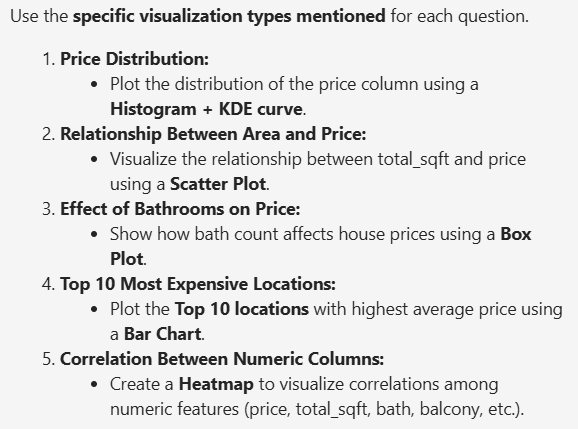

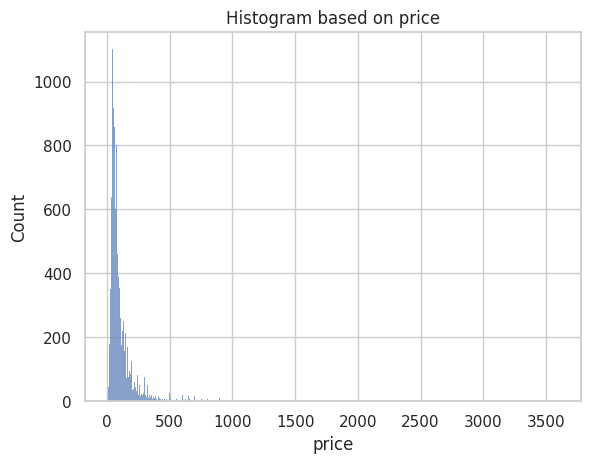

In [ ]:
sns.histplot(df['price'], kde=False)
plt.title('Histogram based on price')
plt.show()


In [ ]:
sns.boxplot(x='bath', y='prices',data=)
plt.title('Box Plot - Total Bill by Day')
plt.show()

ValueError: Could not interpret value `prices` for `y`. An entry with this name does not appear in `data`.